In [1]:
from transformer_utils.low_memory import enable_low_memory_load
import transformers

enable_low_memory_load()
tokenizer = transformers.AutoTokenizer.from_pretrained("gpt2")
model = transformers.AutoModelForCausalLM.from_pretrained('EleutherAI/gpt-neo-125M')

def text_to_input_ids(text):
    toks = tokenizer.encode(text)
    return torch.as_tensor(toks).view(1, -1).cuda()


c:\users\stephenprior\appdata\local\programs\python\python39\lib\site-packages\torch\nn\modules\lazy.py:175: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


In [3]:
import torch
input_ids = text_to_input_ids("A couple of words")

input_shape = input_ids.size()
input_ids = input_ids.view(-1, input_shape[-1])
batch_size = input_ids.shape[0]

past_length = 0
past_key_values = tuple([None] * len(model.transformer.h))
device = input_ids.device if input_ids is not None else inputs_embeds.device
position_ids = torch.arange(past_length, input_shape[-1] + past_length, dtype=torch.long, device=device)
position_ids = position_ids.unsqueeze(0).view(-1, input_shape[-1])

position_ids

tensor([[0, 1, 2, 3]], device='cuda:0')

In [4]:
position_embeds = model.transformer.wpe(position_ids[0])

In [5]:
position_embeds[0]

tensor([ 1.0791e-01, -7.3047e-01,  1.9897e-02, -1.2891e-01, -9.8145e-02,
         1.5625e-01,  4.0039e-02, -3.4961e-01,  5.9814e-02,  4.8242e-01,
        -1.2988e-01,  1.1377e-01,  9.7656e-02,  3.1641e-01,  2.0630e-02,
         4.2480e-02,  1.6895e-01, -3.4766e-01, -1.6992e-01, -3.0078e-01,
         5.3516e-01,  1.6113e-01, -8.1543e-02, -1.4941e-01,  1.0986e-01,
        -3.3008e-01, -1.2891e-01,  4.7363e-02,  5.8594e-01, -5.5176e-02,
        -5.9570e-02,  1.3379e-01,  6.9336e-02, -9.4238e-02, -2.3926e-01,
         5.4443e-02, -5.2979e-02, -6.1279e-02, -2.6367e-01,  5.7422e-01,
         3.5547e-01, -2.9297e-01,  9.7656e-02,  2.3633e-01,  4.7363e-02,
        -3.2031e-01, -1.7676e-01,  4.3945e-01, -3.8867e-01,  2.1484e-01,
        -2.7930e-01,  3.5547e-01, -1.7578e-01, -1.8359e-01,  1.5625e-01,
        -1.1182e-01, -3.3594e-01,  4.7852e-02, -4.8633e-01, -2.4902e-01,
        -7.1094e-01, -7.7148e-02, -1.9043e-01, -2.7539e-01,  1.2598e-01,
        -6.1328e-01, -3.6719e-01, -1.6211e-01,  1.1

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np



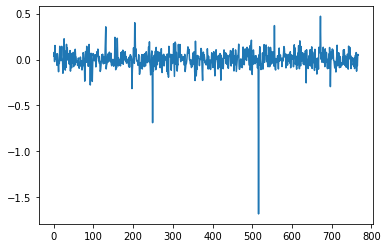

In [7]:
plt.plot(position_embeds[1].cpu().detach().numpy())

In [8]:
model.transformer.wpe.weight.shape


torch.Size([2048, 768])

In [9]:
invwpe = torch.linalg.pinv(model.transformer.wpe.weight)

In [10]:
inverted = torch.matmul(position_embeds[1],invwpe)
inverted

tensor([ 0.0011,  0.9528,  0.0495,  ...,  0.0065, -0.0045, -0.0036],
       device='cuda:0', grad_fn=<SqueezeBackward3>)

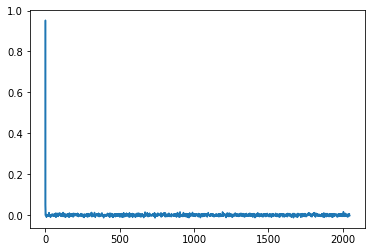

In [11]:
plt.plot(inverted.cpu().detach().numpy())